In [65]:
#audio preprocessing
import librosa

import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [66]:
import os
os.listdir('/content/drive/My Drive/2020/courses taken/AI -ML/daywise worklog/day49(20-07-2020)/AudioData')

['Info.txt', 'JE', 'DC', 'KL', 'JK']

In [67]:
sample_file ="/content/drive/My Drive/2020/courses taken/AI -ML/daywise worklog/day49(20-07-2020)/AudioData/DC/a01.wav"

In [68]:
#load the audio data with librosa from .wav file
#input path
data, sampling_rate = librosa.load(sample_file)
#output is data teh discrete values,sampling rate

In [69]:
#audio sampled data output shape
data.shape

(80434,)

In [70]:
sampling_rate

22050

In [71]:
##data
data[:10]

array([0.03537439, 0.05184603, 0.04569934, 0.04965753, 0.04663509,
       0.04879001, 0.04705136, 0.04866577, 0.04766231, 0.04865323],
      dtype=float32)

In [72]:
print(type(data))

<class 'numpy.ndarray'>


In [73]:
print(data.max())
print(data.min())
print(data.mean())

0.91246253
-1.0036622
0.04223855


Populating the interactive namespace from numpy and matplotlib


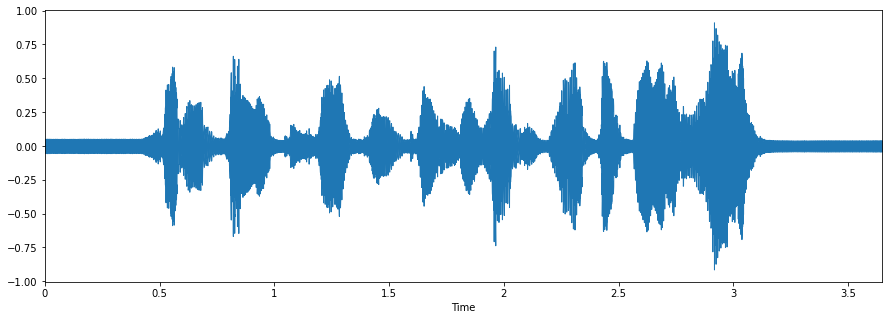

In [74]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [75]:
sample_file1 = '/content/drive/My Drive/2020/courses taken/AI -ML/daywise worklog/day49(20-07-2020)/AudioData/KL/a01.wav'

In [76]:
#load the audio data with librosa from .wav file
#input path
data1, sampling_rate1 = librosa.load(sample_file1)
#output is data teh discrete values,sampling rate

In [77]:
#audio sampled data output shape
data1.shape

(87368,)

In [78]:
sampling_rate1

22050

In [79]:
##data
data1[:10]

array([0.00304998, 0.00444849, 0.00389456, 0.00428622, 0.00404884,
       0.00427337, 0.00417293, 0.00435197, 0.00426693, 0.00437466],
      dtype=float32)

In [80]:
print(data1.max())
print(data1.min())
print(data1.mean())

0.08344578
-0.11337293
0.0024897326


Populating the interactive namespace from numpy and matplotlib


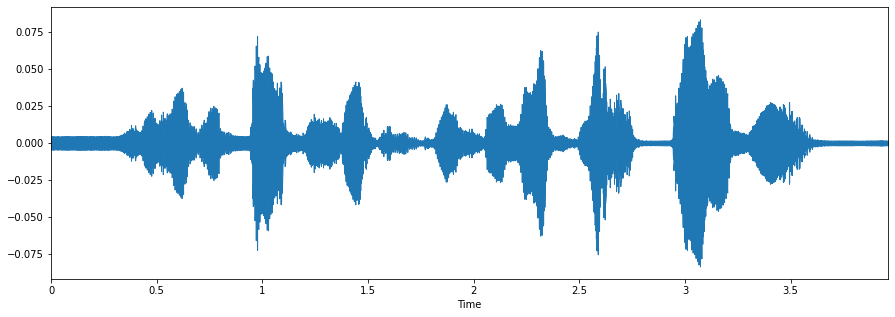

In [81]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data1, sr=sampling_rate1)

In [82]:
X, sample_rate = librosa.load(sample_file, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
X.shape

(110250,)

In [83]:
1*22050*2*2.5

110250.0

In [84]:
librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

array([[-318.34907634, -289.72019185, -269.75849637, ..., -219.42767604,
        -209.46609287, -180.1187328 ],
       [  83.44985313,  135.30527971,  182.35460902, ...,  229.88559252,
         238.01667462,  248.71813002],
       [ -54.12408135,   -7.18993656,   16.98681678, ...,   -4.90131715,
          -0.33663499,   -1.15097019],
       ...,
       [ -11.183432  ,  -10.80955344,   -9.52499654, ...,  -32.88296871,
         -32.24869379,  -24.09375983],
       [ -10.36455051,  -15.87282497,  -20.11362012, ...,  -16.86774535,
         -12.20967621,  -13.46425284],
       [  -0.92029628,   -8.4874924 ,  -13.82025247, ...,    4.01767426,
           8.50465788,   10.81932434]])

In [85]:
librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13).shape

(13, 216)

In [86]:
np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0).shape

(216,)

In [87]:
base_path = '/content/drive/My Drive/2020/courses taken/AI -ML/daywise worklog/day49(20-07-2020)/AudioData'
folders = [fol  for fol in os.listdir(base_path) if os.path.isdir(base_path+'/'+fol)]
folders

['JE', 'DC', 'KL', 'JK']

In [88]:
df = pd.DataFrame(columns=['feature']) #empty dataframe with a single column feature
bookmark=0 #row count
for cls,per in enumerate(folders): #folder name with label
#labels are from 0 to 3
  print(cls,per)
  for name in os.listdir(base_path+'/'+per):
        X, sample_rate = librosa.load(base_path+'/'+per+'/'+name, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        # shape of x is sr*duration
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        #216 values
        feature = mfccs
        #appending class label to numpy array
        feature = np.append(feature,cls)
        #in each row we have single column
        #in that column i have a numpy array as value

        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

0 JE
1 DC
2 KL
3 JK


In [89]:
df.head()

,feature
0,"[3.5299492965367945, 3.3935020076881957, 1.581..."
1,"[-24.170094383389944, -24.094661338599135, -9...."
2,"[-22.51550092789205, -15.531952206108965, -7.2..."
3,"[-25.458699252596645, -25.30736706564826, -26...."
4,"[-25.08270817402452, -25.211529130432726, -10...."


In [90]:
df['feature'][0].shape

(217,)

In [91]:
df['feature'][0][-1]

0.0

In [92]:
df.shape

(480, 1)

In [93]:
df.iloc[0][0].shape

(217,)

In [94]:
df2 = pd.DataFrame(df['feature'].values.tolist())
df2.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216
259,-24.638085,-27.47645,-33.019917,-33.43736,-32.533447,-31.952662,-30.013664,-28.844837,-29.072688,-29.684561,-30.653703,-30.100919,-32.105627,-31.52444,-29.986599,-29.369767,-30.910814,-30.135596,-30.208181,-32.540591,-31.676994,-31.873207,-30.511337,-30.525006,-29.344686,-29.919643,-33.32804,-38.324954,-37.672181,-37.655446,-37.238469,-38.126816,-39.205895,-37.548053,-31.977339,-28.954296,-28.350046,-29.470822,-30.128635,-30.547714,...,-29.279559,-29.645808,-32.182447,-38.108442,-40.073636,-39.943288,-42.545865,-42.634245,-42.348809,-43.079219,-43.457142,-42.404189,-41.288002,-42.41965,-41.520048,-38.283995,-30.999042,-27.364596,-26.000155,-26.21568,-25.973345,-25.407873,-24.74373,-24.056557,-24.057114,-23.691694,-23.51574,-24.319909,-24.531488,-24.765529,-24.909128,-24.722704,-23.710731,-23.819327,-23.630479,-23.652985,-23.693719,-24.798914,-24.674817,2.0


In [95]:
df2.isnull().sum(axis=1)

0       0
1       0
2      69
3       0
4       0
       ..
475    10
476    31
477     0
478     0
479     0
Length: 480, dtype: int64

In [96]:
df2.isnull().sum()

0        0
1        0
2        0
3        0
4        0
      ... 
212    100
213    101
214    101
215    102
216    103
Length: 217, dtype: int64

In [97]:
df2 = df2.dropna()

In [98]:
df2[216].value_counts().sum()

377

In [99]:
df2[216].isnull().sum()

0

In [100]:
df2.shape

(377, 217)

In [101]:
new_df = df2.rename(columns={216: "label"})
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,label
0,3.529949,3.393502,1.581122,0.117455,-2.944852,-3.056374,-1.175403,-2.136643,-4.292749,-5.937324,-8.973770,-12.228952,-6.162340,-2.286926,-1.037475,-1.951216,-2.222021,-1.371666,-1.078009,-0.176724,-0.226750,-1.527521,-1.988343,-4.377648,-6.453167,-9.793393,-13.693820,-16.433676,-18.825826,-18.045779,-14.304377,-4.622837,0.149225,-0.634171,-2.008656,-3.513512,-4.723314,-4.757633,-5.637652,-5.445764,...,-26.520170,-24.762242,-23.020624,-18.458028,-13.908728,-10.333147,-7.374277,-6.486392,-6.859358,-7.239401,-6.605263,-8.052280,-9.013007,-8.072264,-6.643629,-6.462305,-6.937569,-9.000449,-10.025121,-8.818044,-9.844581,-10.489114,-10.257322,-9.158682,-8.059568,-8.446144,-8.687167,-8.110723,-7.476902,-7.376308,-7.628752,-6.795522,-6.259950,-5.866019,-5.707147,-5.065527,-4.295856,2.169405,7.545353,0.0
1,-24.170094,-24.094661,-9.601142,-3.714322,0.797293,1.858434,-1.265900,-3.732545,-4.196689,-5.403189,-5.124485,-5.469441,-8.698426,-12.781067,-10.162155,-8.299360,-4.959671,-3.070056,-3.430014,-5.201535,-4.622440,-2.491305,-1.452581,-3.860088,-6.562961,-7.930981,-6.321495,-5.292420,-5.257919,-5.137785,-5.269797,-5.619560,-3.867031,-2.934800,-2.913081,-5.081114,-10.583761,-14.018868,-16.256629,-17.175667,...,-24.460299,-23.765543,-24.569724,-25.877028,-26.477489,-26.631025,-28.372223,-26.997070,-26.283700,-27.126463,-26.104533,-27.481027,-27.492673,-25.431814,-25.381361,-24.917548,-23.053988,-22.077476,-21.619407,-21.848994,-20.785571,-20.997079,-24.328142,-24.275333,-25.353506,-22.977321,-23.786736,-24.796406,-24.237703,-22.844766,-23.453355,-26.091680,-24.624404,-23.409434,-23.891389,-23.145431,-23.774141,-24.094874,-22.963107,0.0
3,-25.458699,-25.307367,-26.562066,-25.635848,-24.413176,-24.330746,-25.231881,-24.310298,-24.332099,-20.944345,-15.979261,-5.539458,-1.756211,-0.161437,-0.274833,-2.412469,-5.660424,-8.970177,-10.744764,-12.576181,-12.843405,-13.609522,-13.780352,-14.411007,-13.463338,-10.353508,-8.922226,-9.859529,-6.433242,-4.854305,-8.181603,-11.434088,-11.670716,-8.565809,-7.373743,-7.185267,-4.975200,-3.933481,-3.654960,-4.448780,...,0.367393,-0.158724,-0.616696,-1.267337,-2.047972,-2.826475,-4.094759,-5.985270,-8.207567,-9.457543,-10.795895,-11.896204,-11.147610,-11.859442,-17.699827,-20.339299,-21.564096,-22.112553,-22.755406,-24.880546,-25.788028,-26.505943,-26.111740,-26.400599,-27.348649,-27.729517,-28.141801,-26.481350,-27.682820,-28.726685,-27.912122,-28.625142,-27.510296,-26.547950,-26.880675,-25.819318,-27.104844,-27.745132,-25.859411,0.0
4,-25.082708,-25.211529,-10.960526,-2.494657,-0.711743,-0.107495,1.349230,2.382443,2.559838,-1.681059,-7.731854,-13.696166,-13.500442,-13.598779,-14.571177,-15.117069,-18.433275,-20.404400,-20.638127,-21.622236,-23.330882,-23.508355,-21.635039,-21.065160,-12.081862,-5.228182,-1.319949,-1.447118,-5.244732,-5.935609,-3.983313,-4.677837,-6.355636,-4.663865,-0.224138,2.877790,0.539785,-5.361162,-5.508417,-3.996268,...,-0.702761,-1.914688,-2.737974,-0.978604,-0.945886,-0.462286,-0.192789,-0.918264,-3.140287,-4.228290,-5.543325,-7.504154,-9.443468,-15.092895,-18.300844,-20.470281,-22.440068,-23.762655,-24.293551,-24.787956,-24.515277,-24.634491,-26.463796,-28.088424,-26.549329,-25.644560,-26.490921,-26.936973,-25.805706,-25.769703,-25.222925,-22.785147,-23.360131,-22.886477,-21.424888,-22.595119,-23.384199,-23.606464,-25.523274,0.0
5,-23.049968,-24.298283,-24.185276,-24.487664,-25.568799,-25.687105,-26.123712,-24.602636,-25.202267,-26.601837,-26.052129,-25.760680,-23.779370,-24.826245,-21.656409,-10.903756,-4.612804,-0.905796,-0.489042,-3.510225,-4.843920,-4.776575,-3.896817,-1.118703,1.415768,3.258394,3.865701,2.837688,1.499175,-0.194277,-0.042299,1.628584,1.758420,1.480264,0.018137,-0.757888,-4.692052,-7.7

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_df.drop('label',axis=1),new_df['label'],random_state=5)
print(X_train.shape)

(282, 216)


In [126]:
y_train.value_counts(normalize=True)

0.0    0.283688
3.0    0.262411
1.0    0.255319
2.0    0.198582
Name: label, dtype: float64

In [127]:
y_test.value_counts(normalize=True)

3.0    0.315789
0.0    0.294737
1.0    0.242105
2.0    0.147368
Name: label, dtype: float64

In [105]:
# Import the model
from sklearn.neighbors import KNeighborsClassifier
# Creating an instance
knn = KNeighborsClassifier()
#training
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [106]:
from sklearn.metrics import accuracy_score
y_train_pred = knn.predict(X_train)
accuracy_score(y_train,y_train_pred)

0.7021276595744681

In [107]:
from sklearn.metrics import accuracy_score
y_test_pred = knn.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.5684210526315789

In [108]:
#import initialize and fit
#import the RFC from sklearn
from sklearn.ensemble import RandomForestClassifier

#initialize the object for RFC
rfc = RandomForestClassifier()

#fit RFC to dataset
final_model2 = rfc.fit(X_train,y_train)

In [109]:
from sklearn.metrics import accuracy_score
y_train_pred1 = rfc.predict(X_train)
accuracy_score(y_train,y_train_pred1)

1.0

In [110]:
from sklearn.metrics import accuracy_score
y_test_pred1 = rfc.predict(X_test)
accuracy_score(y_test,y_test_pred1)

0.6736842105263158

ANN

In [128]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [129]:
y_train_cat

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [130]:
y_train[:5]

313    2.0
280    2.0
474    3.0
382    3.0
336    2.0
Name: label, dtype: float64

In [131]:
## Bulding the model
model_ann = Sequential()
model_ann.add(Dense(512,input_shape=(216,),activation='relu'))
model_ann.add(Dense(64,activation='relu'))
model_ann.add(Dense(4,activation='softmax'))
model_ann.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               111104    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
Total params: 144,196
Trainable params: 144,196
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Compiling the model
model_ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [133]:
## Train the model
model_ann.fit(X_train,y_train_cat,epochs=20,validation_data=(X_test,y_test_cat))

Train on 282 samples, validate on 95 samples
Epoch 1/20
282/282 [==============================] - 0s 564us/step - loss: 10.6721 - accuracy: 0.2589 - val_loss: 3.2747 - val_accuracy: 0.4316
Epoch 2/20
282/282 [==============================] - 0s 148us/step - loss: 3.1200 - accuracy: 0.4255 - val_loss: 3.9397 - val_accuracy: 0.3263
Epoch 3/20
282/282 [==============================] - 0s 166us/step - loss: 3.2284 - accuracy: 0.4113 - val_loss: 2.2280 - val_accuracy: 0.3789
Epoch 4/20
282/282 [==============================] - 0s 139us/step - loss: 1.6457 - accuracy: 0.5355 - val_loss: 1.3722 - val_accuracy: 0.5053
Epoch 5/20
282/282 [==============================] - 0s 142us/step - loss: 1.0697 - accuracy: 0.6206 - val_loss: 1.3183 - val_accuracy: 0.5263
Epoch 6/20
282/282 [==============================] - 0s 146us/step - loss: 0.9301 - accuracy: 0.6489 - val_loss: 1.4498 - val_accuracy: 0.5474
Epoch 7/20
282/282 [==============================] - 0s 137us/step - loss: 0.7645 - accur

CNN

In [134]:
X_train.shape

(282, 216)

In [114]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [115]:
x_traincnn.shape

(282, 216, 1)

In [116]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [117]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_5 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_6 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 27, 128)          

In [118]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [135]:
cnnhistory=model.fit(x_traincnn, y_train_cat, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test_cat))

Train on 282 samples, validate on 95 samples
Epoch 1/100
282/282 [==============================] - 0s 478us/step - loss: 0.4548 - accuracy: 0.8652 - val_loss: 0.7485 - val_accuracy: 0.6947
Epoch 2/100
282/282 [==============================] - 0s 493us/step - loss: 0.4534 - accuracy: 0.8475 - val_loss: 0.7537 - val_accuracy: 0.6737
Epoch 3/100
282/282 [==============================] - 0s 461us/step - loss: 0.4433 - accuracy: 0.8440 - val_loss: 0.7575 - val_accuracy: 0.6842
Epoch 4/100
282/282 [==============================] - 0s 480us/step - loss: 0.4435 - accuracy: 0.8652 - val_loss: 0.7637 - val_accuracy: 0.6737
Epoch 5/100
282/282 [==============================] - 0s 455us/step - loss: 0.4433 - accuracy: 0.8617 - val_loss: 0.7524 - val_accuracy: 0.6842
Epoch 6/100
282/282 [==============================] - 0s 471us/step - loss: 0.4368 - accuracy: 0.8582 - val_loss: 0.7447 - val_accuracy: 0.6842
Epoch 7/100
282/282 [==============================] - 0s 461us/step - loss: 0.4345 -

In [137]:
### Read
test_path = "/content/drive/My Drive/2020/courses taken/AI -ML/daywise worklog/day49(20-07-2020)/AudioData/JK/a09.wav"

In [138]:
X, sample_rate = librosa.load(test_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
# shape of x is sr*duration
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
mfccs

array([ 1.62411072e-01, -4.85493582e-01,  2.70025942e-01,  1.10022050e+00,
        3.30421731e+00,  2.44054675e+00, -1.33177334e+00, -2.11240397e+00,
       -2.52460048e+00, -3.54046423e+00, -2.89325909e+00, -3.57695482e+00,
       -3.22369067e+00, -6.09003504e+00, -9.02253025e+00, -9.65386104e+00,
       -1.16928809e+01, -1.22227337e+01, -1.22481141e+01, -1.17000389e+01,
       -1.11057419e+01, -1.06824580e+01, -1.14395274e+01, -1.29920827e+01,
       -1.09694122e+01, -9.46338637e+00, -5.05697140e+00, -4.32409900e+00,
       -8.49821951e+00, -8.49386135e+00, -9.17855534e+00, -9.75737742e+00,
       -9.70068688e+00, -7.79217319e+00, -7.97679177e+00, -6.94509526e+00,
       -5.47205864e+00, -4.79037709e+00, -4.18806771e+00, -2.02562605e+00,
       -1.46703509e+00, -1.38500981e-01,  5.91394024e-01,  1.11204307e+00,
        5.74460340e-02, -1.13716797e+00, -4.24657144e+00, -4.23475932e+00,
       -3.76589442e+00, -5.20056754e+00, -3.72877065e+00, -3.20844261e+00,
       -3.80126373e+00, -

In [139]:
mfccs.shape

(216,)

In [143]:
## Knn prediction
## input shape 2d Array(sample_size*216)
#knn.predict(np.expand_dims(mfccs,0))
knn.predict([mfccs.tolist()])

array([3.])

In [144]:
model_ann.predict(np.expand_dims(mfccs,0))

array([[0.06892281, 0.13093866, 0.00715735, 0.79298115]], dtype=float32)

In [145]:
model_ann.predict_classes(np.expand_dims(mfccs,0))

array([3])

In [147]:
model.predict(np.expand_dims(np.expand_dims(mfccs,axis=1),0))

array([[1.5186578e-01, 7.6421291e-02, 1.5310200e-09, 7.7171290e-01]],
      dtype=float32)

In [148]:
model.predict_classes(np.expand_dims(np.expand_dims(mfccs,axis=1),0))

array([3])

In [149]:
label_map = {0:'JE',1:'DC',2:'KL',3:'JK'}
#['JE', 'DC', 'KL', 'JK']

### Outline
- Data Format
- Read the data
- How many classes are there
- Checking with a sampel
- Converting the entire dataset(Add labels in the data)
- label_map
- Waveplot for randomsampples in each class
- balnaced data or imablaned
- barplot or count plot for the label
- Choose the algorithms
- Based on that preprocessing
- Train those modles
- check both trainig and tessting score(metric you have selected)
- metrics visulaizatio
- choose the best
- Test with raw data